**IMAGE PROCESSING ASSIGNMENT**

For this project, to create a hybrid image, we need two input images. I used my two soft toys, mickey and husky. Mickey went thriugh high pass filter and husky was passed through low pass filter.

Text(0.5, 1.0, 'image_high')

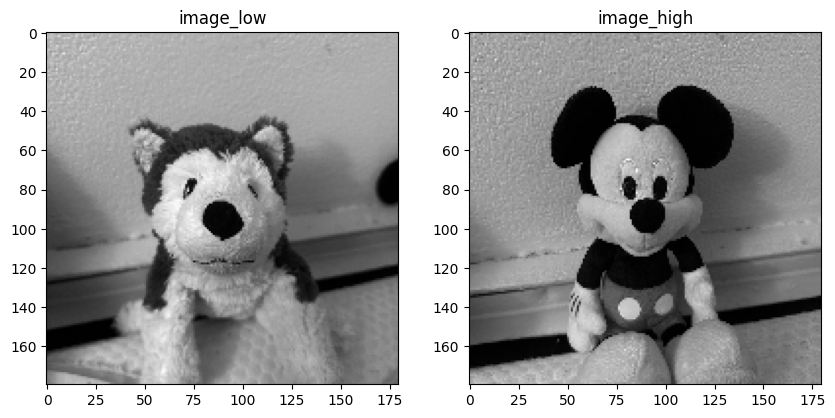

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load images
image_low = cv2.imread('/content/husky.jpeg')
image_high = cv2.imread('/content/mickey.jpeg')

image_low = cv2.cvtColor(image_low, cv2.COLOR_BGR2GRAY)
image_high = cv2.cvtColor(image_high, cv2.COLOR_BGR2GRAY)
image_low = cv2.resize(image_low,(180,180))
image_high = cv2.resize(image_high,(180,180))

fig = plt.figure(figsize = (10,10))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 2, 1)
plt.imshow(image_low, cmap='gray')
plt.title('image_low')

# Right Image
fig.add_subplot(1, 2, 2)
plt.imshow(image_high, cmap='gray')
plt.title('image_high')

In [3]:
image_low.shape

(180, 180)

In [4]:
image_high.shape

(180, 180)

The below is our convolve function

In [5]:
def convolve(image, kernel):

    # Get the image dimensions
    image_height = image.shape[0]
    image_width = image.shape[1]

    # Get the kernel dimensions
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    padded_height = padded_image.shape[0]
    padded_width = padded_image.shape[1]

    output = np.zeros((image_height, image_width))

    # All the rows except for the edge pixels.
    for y in range(image_height):
        # All the pixels except for the edge pixels.
        for x in range(image_width):

            # Mat or kernel frame. Part of the image to perform convolution.
            mat = padded_image[y:y+kernel_height, x:x+kernel_width]

            # Perform convolution.
            output[y,x] = int(np.sum(np.multiply(mat, kernel)))

    # If the output has negative numbers clip to 0->255 range.
    if(np.min(output) < 0):
        output = np.clip(output,0,255)

    # return image
    return output

In [7]:
gaussian_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]],dtype=np.float32) * 1/16

Apply a Gaussian blur to the image to get a low-pass version of the image

Text(0.5, 1.0, 'Gaussian Filter')

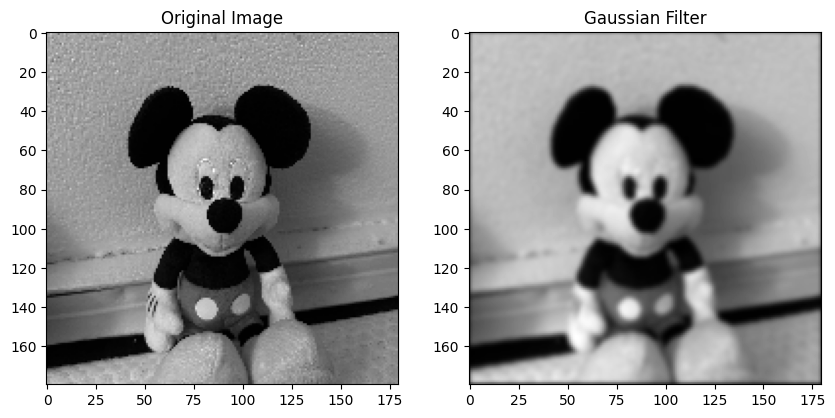

In [8]:
imgGaus = convolve(image_high,gaussian_filter)
for i in range(2):
  imgGaus = convolve(imgGaus,gaussian_filter)
# Plot size
fig = plt.figure(figsize = (10,10))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 2, 1)
plt.imshow(image_high, cmap='gray')
plt.title('Original Image')

# Right Image
fig.add_subplot(1, 2, 2)
plt.imshow(imgGaus, cmap='gray')
plt.title('Gaussian Filter')

subtract the low-pass
version image from the original image. The result will be an image that retains only the fine details.

Text(0.5, 1.0, 'High pass Filtered Image')

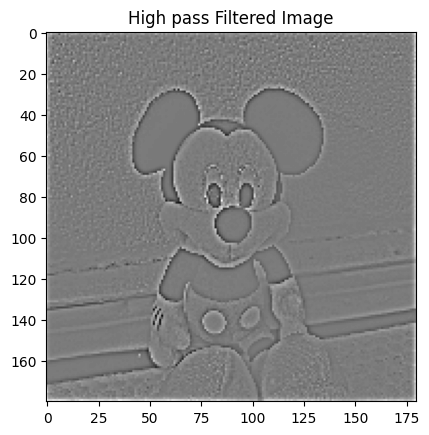

In [11]:
subtracted_image = np.subtract(image_high, imgGaus)

plt.imshow(subtracted_image,cmap='gray')
plt.title('High pass Filtered Image')

Simply apply a Gaussian blur to the image. The result is a smoothed image where fine details
are suppressed.

Text(0.5, 1.0, 'Gaussian Filter')

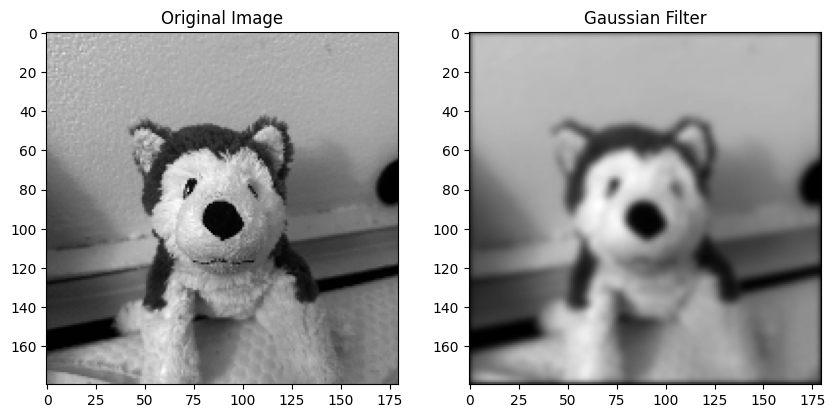

In [12]:
low_pass = convolve(image_low,gaussian_filter)
for i in range(5):
  low_pass = convolve(low_pass,gaussian_filter)

fig = plt.figure(figsize = (10,10))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 2, 1)
plt.imshow(image_low, cmap='gray')
plt.title('Original Image')

# Right Image
fig.add_subplot(1, 2, 2)
plt.imshow(low_pass, cmap='gray')
plt.title('Gaussian Filter')

**The below is the hybrid image. If we move far we can see husky more clearly.**

Text(0.5, 1.0, 'Hybrid Image')

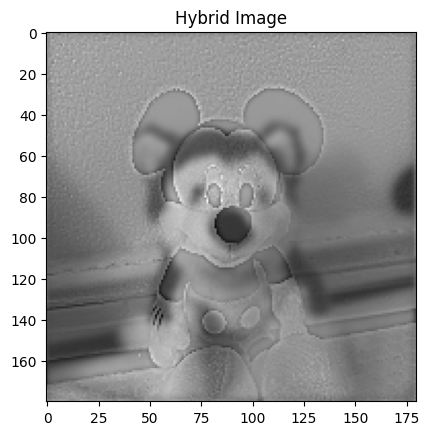

In [13]:
array1 = np.array(low_pass)
array2 = np.array(subtracted_image)
summed_array = np.add(array1, array2)
plt.imshow(summed_array,cmap='gray')
plt.title('Hybrid Image')
